# **Project Summary -**

The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. Each app (row) has values for category, rating, size, and more. Another dataset contains customer reviews of the android apps. Explore and analyse the data to discover key factors responsible for app engagement and success.

# **Links :**

Github: https://github.com/mdismailquraishicse/PlayStoreAppReviewAnalysis
<br><br>
Tabluea: https://public.tableau.com/views/PlayStoreAppReviewAnalysis_17143051495800/Dashboard1?:language=en-GB&publish=yes&:sid=&:display_count=n&:origin=viz_share_link

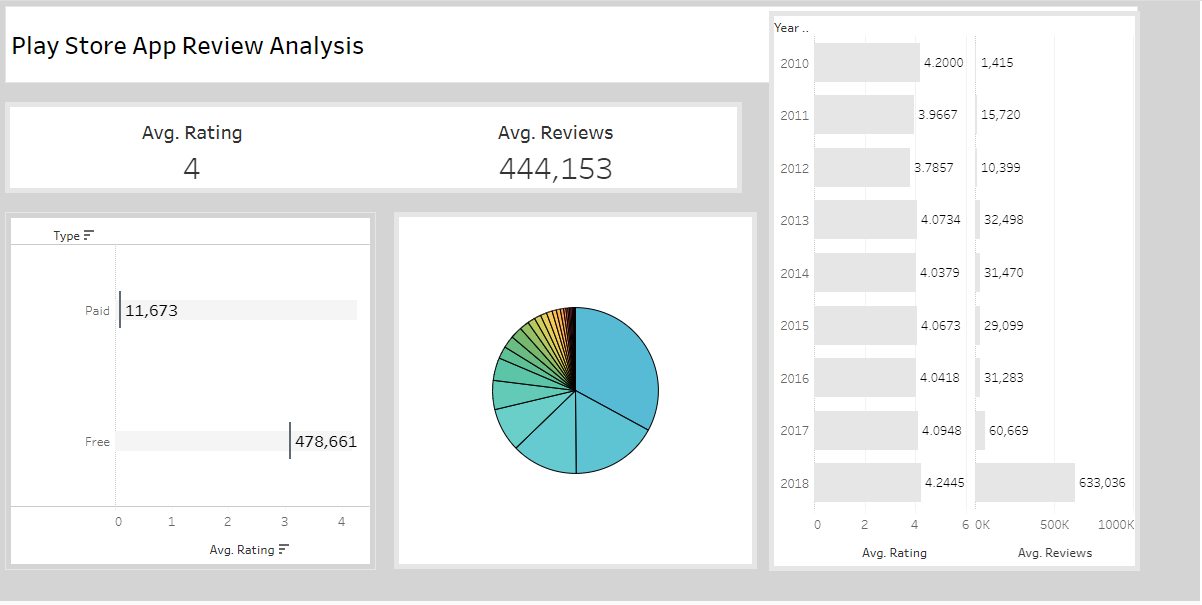

# **Problem Statement**


Our company wants to make android apps. We want to use EDA to understand what kind of apps are profitable in terms of money and fame for our business.

#### **Define Your Business Objective?**

1. In this project we will analyse this data with different types of features. categorywise, ratingwise, sizewise, genreswise, versionwise etc.
2. In Category column we will analyse 'FAMILY', 'GAME', 'TOOLS', 'BUSINESS', 'MEDICAL', 'COMMUNICATIONS'.

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# paths
path_psd= '/content/drive/MyDrive/MyProjects/ML Projects/EDA/PlayStoreAppReviewAnalysis/data/Play Store Data.csv'
path_review= '/content/drive/MyDrive/MyProjects/ML Projects/EDA/PlayStoreAppReviewAnalysis/data/User Reviews.csv'
# path_psd = './data/Play Store Data.csv'
# path_review = './data/User Reviews.csv'

# class defination for dataframe
class DfClass:
    def __init__(self, path):
        ''' Takes path of the csv file while creating object '''
        # read the file
        self.df =pd.read_csv(path)
        # calculate and assign null to null_df
        self.null_df = self.df.isna().sum().reset_index().rename(columns={'index':'features', 0:'null_count'})
        self.null_df['null_pct'] = round(self.null_df['null_count']/len(self.df)*100,2)
    # get dataframe
    def get_df(self):
        ''' returns dataframe '''
        return self.df

    def show_info(self):
        ''' takes nothing and displays basic informations about the dataframe '''
        print('Shape : ',self.df.shape)
        print()
        print('Duplicate count : ',self.df.duplicated().sum())
        print()
        print('Columns : ',list(self.df.columns))
        print()
        print('Info :')
        print(self.df.info())

    # Missing/null
    def null_calculator(self,df):
        ''' takes dataframe and returns null details '''
        n = len(df)
        df = df.isna().sum().reset_index().rename(columns={'index':'features', 0:'null_count'})
        df['null_pct'] =round(df['null_count']/n*100,2)
        return df
    def show_null(self):
        ''' displays null details '''
        print(self.null_df)

    def plot_null(self):
        ''' plot bar chart for null values '''
        plt.rcParams['figure.figsize']=(14,.25*len(self.null_df))
        sns.barplot(self.null_df, x='null_count', y='features')
        plt.show()
    # Unique
    def show_all_unique_count(self):
        ''' displays unique values for each column '''
        print('Unique values')
        print(self.df.nunique())

    def get_unique(self,col):
        print('Unique count : ', self.df[col].nunique())
        return list(self.df[col].unique())


# making new object
df_obj = DfClass(path_psd)

In [4]:
# First view
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_obj.get_df().head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [5]:
# basic details
df_obj.show_info()

Shape :  (10841, 13)

Duplicate count :  483

Columns :  ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']

Info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 

In [6]:
# describe
df_obj.get_df().describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


Till now we observed that there are some features which should be treated as numerice but they are object type. we have to consider this issue and treat it later. ['Reviews', 'Size', 'Installs', 'Price', 'Current Ver', 'Android Ver']

In [7]:
df_obj.show_null()

          features  null_count  null_pct
0              App           0      0.00
1         Category           0      0.00
2           Rating        1474     13.60
3          Reviews           0      0.00
4             Size           0      0.00
5         Installs           0      0.00
6             Type           1      0.01
7            Price           0      0.00
8   Content Rating           1      0.01
9           Genres           0      0.00
10    Last Updated           0      0.00
11     Current Ver           8      0.07
12     Android Ver           3      0.03


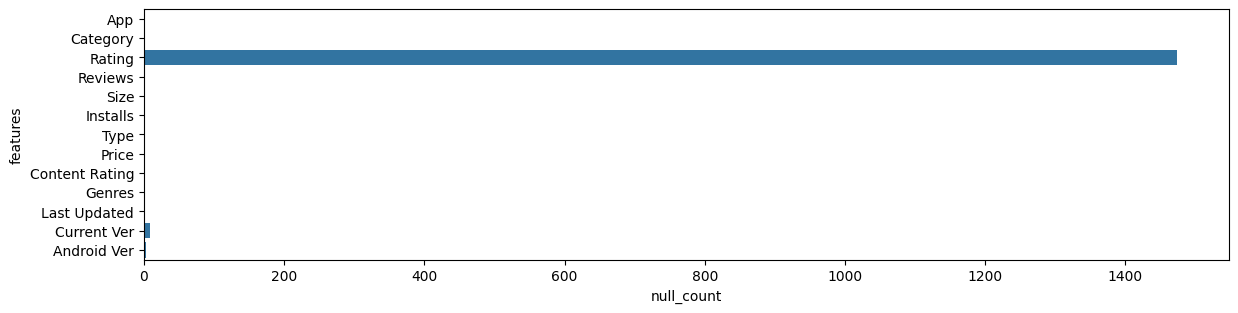

In [8]:
# Visualizing the missing values
df_obj.plot_null()

In [9]:
df_obj.show_all_unique_count()

Unique values
App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64


In [10]:
# Category, Rating, Installs, Type, Content Rating, Android Ver
list_of_high_unique=['reviews','app','size','last updated', 'current ver']
for col in df_obj.df.columns:
    if col.lower() not in list_of_high_unique:
        print('Column : ',col)
        print(df_obj.get_unique(col))
        print()

Column :  Category
Unique count :  34
['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE', 'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL', 'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL', 'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER', 'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION', '1.9']

Column :  Rating
Unique count :  40
[4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, nan, 4.8, 4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 2.6, 3.0, 1.9, 2.5, 2.8, 2.7, 1.0, 2.9, 2.3, 2.2, 1.7, 2.0, 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2, 19.0]

Column :  Installs
Unique count :  22
['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+', '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+', '1,000,000,000+', '1,000+', '500,000,000+', '50+'

The file contains details of app uploaded on playstore like ratings, review, etc.

### Variable Description
1. App : app name
2. Category : app category
3. Rating : ratings given by users
4. Reviews : reviews
5. Size : size of the app
6. Installs : Number of users who installed the app
7. Type :
8. Price : Price of the app at google play
9. Content Rating : Tells what kind of people can use the app
10. Genres :
11. Last Updated : date when the app was updated last time
12. Current Ver : Current version

## 3. ***Data Wrangling***

In [11]:
# Data wrangling code
class DataWrangling:
    def __init__(self,df):
        self.df = df.copy()
    # by value
    def get_by_value(self,col,val):
        df =self.df[self.df[col]==val]
        print('Shape : ',df.shape)
        return df
    # change reviews dtype
    def reviews_dtype(self,x):
        try:
            x = int(x)
        except:
            if x[-1].lower()== 'm':
                x= int(x[:-3])*10**6
            elif x[-1].lower()=='b':
                x= int(x[:-3])*10**9
            elif x[-1].lower()=='t':
                x= int(x[:-3])*10**12
        return int(x)
    # change installs dtype
    def installs_dtype(self,x):
        try:
            x= x[:-1].split(',')
            x=int(''.join(x))
        except:
            try:
                x=float(x)
            except:
                x= float(0)
        return int(x)
    # change price dtype
    def price_dtype(self,x):
        try:
            x = float(x)
        except:
            try:
                x=float(x[1:])
            except:
                x=0.0
        return x
    # change size dtype
    def size_dtype(self,x):
        k=1024
        try:
            if x[-1].lower()=='b':
                x =float(x[:-1])
            elif x[-1].lower()=='k':
                x=float(x[:-1])*k
            elif x[-1].lower()=='m':
                x=float(x[:-1])*k**2
            elif x[-1].lower()=='g':
                x=float(x[:-1])*k**3
            elif x[-1].lower()=='t':
                x=float(x[:-1])*k**4
            else:
                x=float(x[:-1])
        except:
            x = float(0)
        return x
    # date time conversion
    def date_conversion(self, x):
        months = ['January','February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
        try:
            for i in range(12):
                if months[i] in x:
                    x = x.replace(months[i],str(i+1))
            x= x.split()
            x='/'.join(x)
            x= x.split(',')
            x = ''.join(x)
            x =datetime.strptime(x, "%m/%d/%Y")
            return x
        except:
            x='1/1/2024'
            x =datetime.strptime(x, "%m/%d/%Y")
            return x
    # apply above function
    def apply_dtype_changer(self):
        self.df['Reviews']=self.df['Reviews'].apply(self.reviews_dtype)
        self.df['Installs']=self.df['Installs'].apply(self.installs_dtype)
        self.df['Price']=self.df['Price'].apply(self.price_dtype)
        self.df['size_in_bytes']=self.df['Size'].apply(self.size_dtype)
        self.df['Last Updated'] = self.df['Last Updated'].apply(self.date_conversion)
    # readable size
    def readable_size(self, x):
        if x>=1024**4:
            return round(x/1024**4,2),'T'
        elif x>=1024**3:
            return round(x/1024**3,2),'G'
        elif x>=1024**2:
            return round(x/1024**2,2),'M'
        elif x>= 1024:
            return round(x/1024,2),'K'
        else:
            return x,'B'

    def top_by_reviews(self, df_,col):
        return df_.groupby([col])['Reviews'].sum().sort_values(ascending=False).reset_index()

    def top_by_installs(self, df_,col):
        return df_.groupby([col])['Installs'].sum().sort_values(ascending=False).reset_index()

    # data wrangling function
    def data_wrangling(self):
        print('Shape: ', self.df.shape)
        self.df.drop_duplicates(inplace=True)
        self.df= self.df[self.df['Type']!='0']
        print('duplicates have been dropped')
        print('shape: ', self.df.shape)
        self.apply_dtype_changer()
        print(f'data type changer has been applied for the columns reviews, installs, price, size, Last Updated')
        self.df.fillna(method='bfill', inplace=True)
        print('null imputed using bfill method')
        self.paid= self.df[self.df['Type']=='Paid']
        self.free= self.df[self.df['Type']=='Free']
        self.df_success= self.df[(self.df['Rating']>3.5) & (self.df['Type']=='Paid')]
        self.df_success_free= self.df_success[self.df_success['Type']=='Free']
        self.df_success_paid= self.df_success[self.df_success['Type']=='Paid']
        print('free, paid, df_success, df_success_free, df_success_paid  have been created')
        self.df['la_year']=self.df['Last Updated'].apply(lambda x: x.year)
# creating object and performing data wrangling
dataWrangling = DataWrangling(df=df_obj.get_df())
dataWrangling.data_wrangling()

Shape:  (10841, 13)
duplicates have been dropped
shape:  (10357, 13)
data type changer has been applied for the columns reviews, installs, price, size, Last Updated
null imputed using bfill method
free, paid, df_success, df_success_free, df_success_paid  have been created


In [12]:
x= round(dataWrangling.df.groupby(['Genres'])['size_in_bytes'].mean(),2)
x=x.sort_values(ascending=False).reset_index()
# x['s']=x['size_in_bytes'].apply(dataWrangling.readable_size)
x.index= x.Genres
x['Size']= x['size_in_bytes'].apply(dataWrangling.readable_size)
x=x.apply(lambda o: str(o['Size'][0])+str(o['Size'][1]), axis=1)
x.drop(columns=['Genres'],inplace=True)
def highest_size():
    return round(dataWrangling.df.groupby(['Genres'])['size_in_bytes'].mean(),0).sort_values(ascending=False).reset_index()

In [13]:
top_gen_count= dataWrangling.df['Genres'].value_counts().sort_values(ascending=False).reset_index().head()
costliest_genres= dataWrangling.paid.groupby(['Genres'])['Price'].mean().sort_values(ascending=False).reset_index().head()
print('1. Top 10 genres with higest app counts')
print(top_gen_count)
print()

genres_highest_reviews = dataWrangling.top_by_reviews(dataWrangling.df,'Genres')
top_apps= dataWrangling.top_by_reviews(dataWrangling.df,'App')
top_free_apps= dataWrangling.top_by_reviews(dataWrangling.free,'App')
top_paid_apps= dataWrangling.top_by_reviews(dataWrangling.paid,'App')

app_highest_size= dataWrangling.df.sort_values(by='size_in_bytes', ascending=False).reset_index().head()[['App','Size']]
top_category_by_size= []

print('2. Costliest genres')
print(costliest_genres)
print()
print('3. Genres with highest review')
print(genres_highest_reviews.head(10))
print()
print('4. Top app with highest number of reviews: ')
print(top_apps.head())

1. Top 10 genres with higest app counts
          Genres  count
0          Tools    842
1  Entertainment    588
2      Education    527
3       Business    427
4        Medical    408

2. Costliest genres
          Genres       Price
0        Finance  170.637059
1      Lifestyle  124.256316
2         Events  109.990000
3  Entertainment   87.635789
4       Business   14.607500

3. Genres with highest review
                    Genres    Reviews
0            Communication  601273552
1                   Social  533576829
2                   Casual  367220219
3                   Action  313193086
4                   Arcade  308758806
5                 Strategy  278239097
6                    Tools  272842708
7              Photography  204297410
8                   Sports  181950480
9  Video Players & Editors  110101364

4. Top app with highest number of reviews: 
                  App    Reviews
0           Instagram  199664676
1            Facebook  156286514
2      Subway Surfers  13860

In [14]:
huge_size= highest_size()
print(huge_size.head(5))

                                Genres  size_in_bytes
0               Lifestyle;Pretend Play    104857600.0
1                  Adventure;Education     96468992.0
2                  Arcade;Pretend Play     95420416.0
3  Health & Fitness;Action & Adventure     87031808.0
4               Role Playing;Education     87031808.0


1. Duplicates have been dropped.
2. data types have been changed for Reviews, Size, Price, Installs, Last Updated.
3. Null values treated.

1. Top genres with 842 number of app is: Tools
2. Costliest genres with mean price $170.64 is: Finance
3. Top Genres with reviews 601273552 is: Communication
4. Top Genres with mean size 104857600 bytes is: Lifestyle;Pretend Play

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Rating distplot

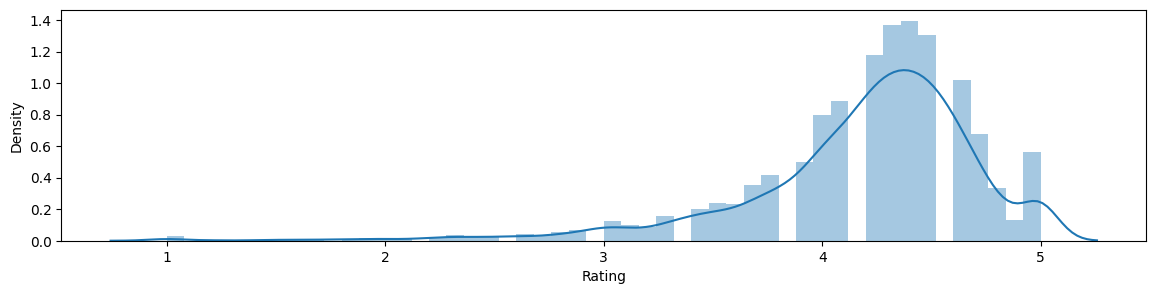

In [15]:
# Chart - 4 visualization code
plt.rcParams['figure.figsize']=(14,3)
sns.distplot(dataWrangling.df['Rating'])
plt.show()

Rating is negatively skewed we need to handle it using transformation method.

#### Reviews distplot

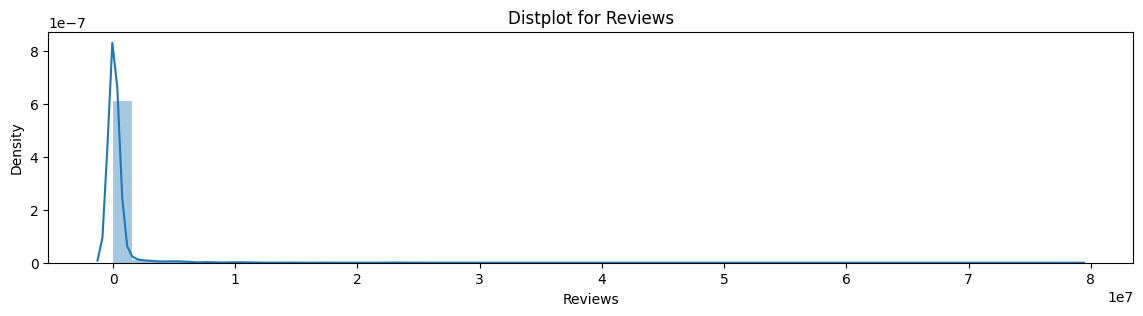

In [16]:
sns.distplot(dataWrangling.df['Reviews'])
plt.title('Distplot for Reviews')
plt.show()

Reviews is positively skewed. This need to be transformed during preprocessing.

#### Genres count

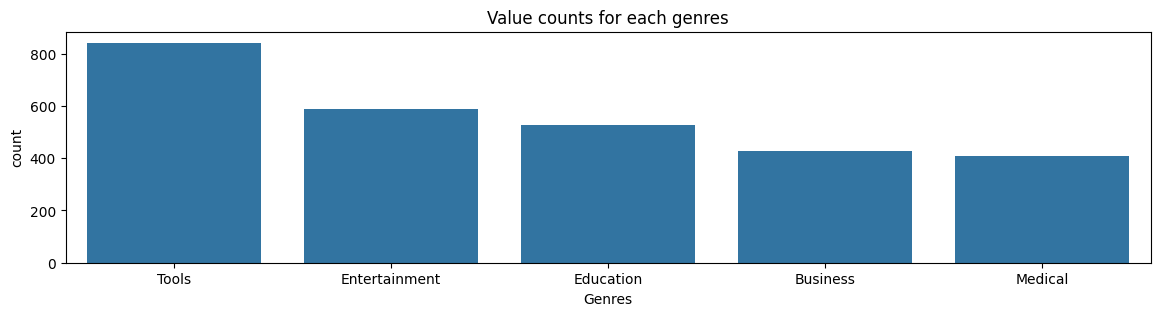

In [17]:
sns.barplot(data=top_gen_count, x='Genres', y='count')
plt.title('Value counts for each genres')
plt.show()

In the above chart I observed that counts for Tools is 800+ that is highest then Entertainment and Education between 500-600, and rest of the genres are between 400-500.

#### Price for Genres

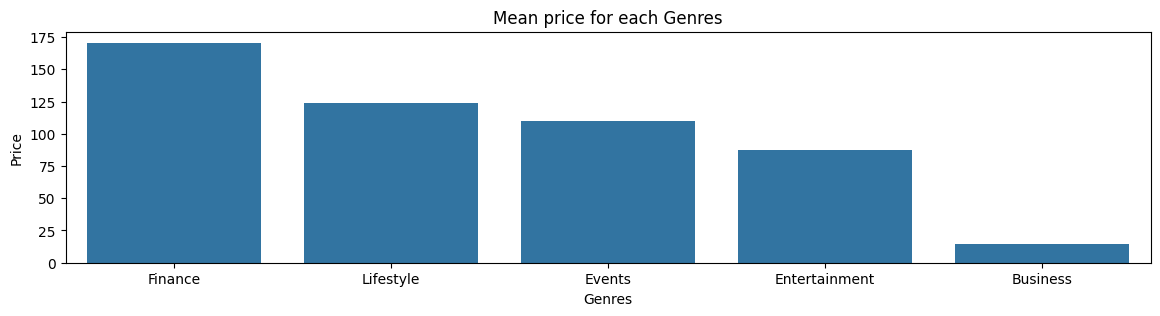

In [18]:
# Chart - 2 visualization code
sns.barplot(data=costliest_genres, x='Genres', y='Price')
plt.title('Mean price for each Genres')
plt.show()

I picked this chart to see mean price for each genres and I found that mean price for finance, Lifestyle, Events and Entertainment are greater than 100 that mean much high and rest of the genres is lower than 20$ price.

#### Sum of Reviews for each Genres

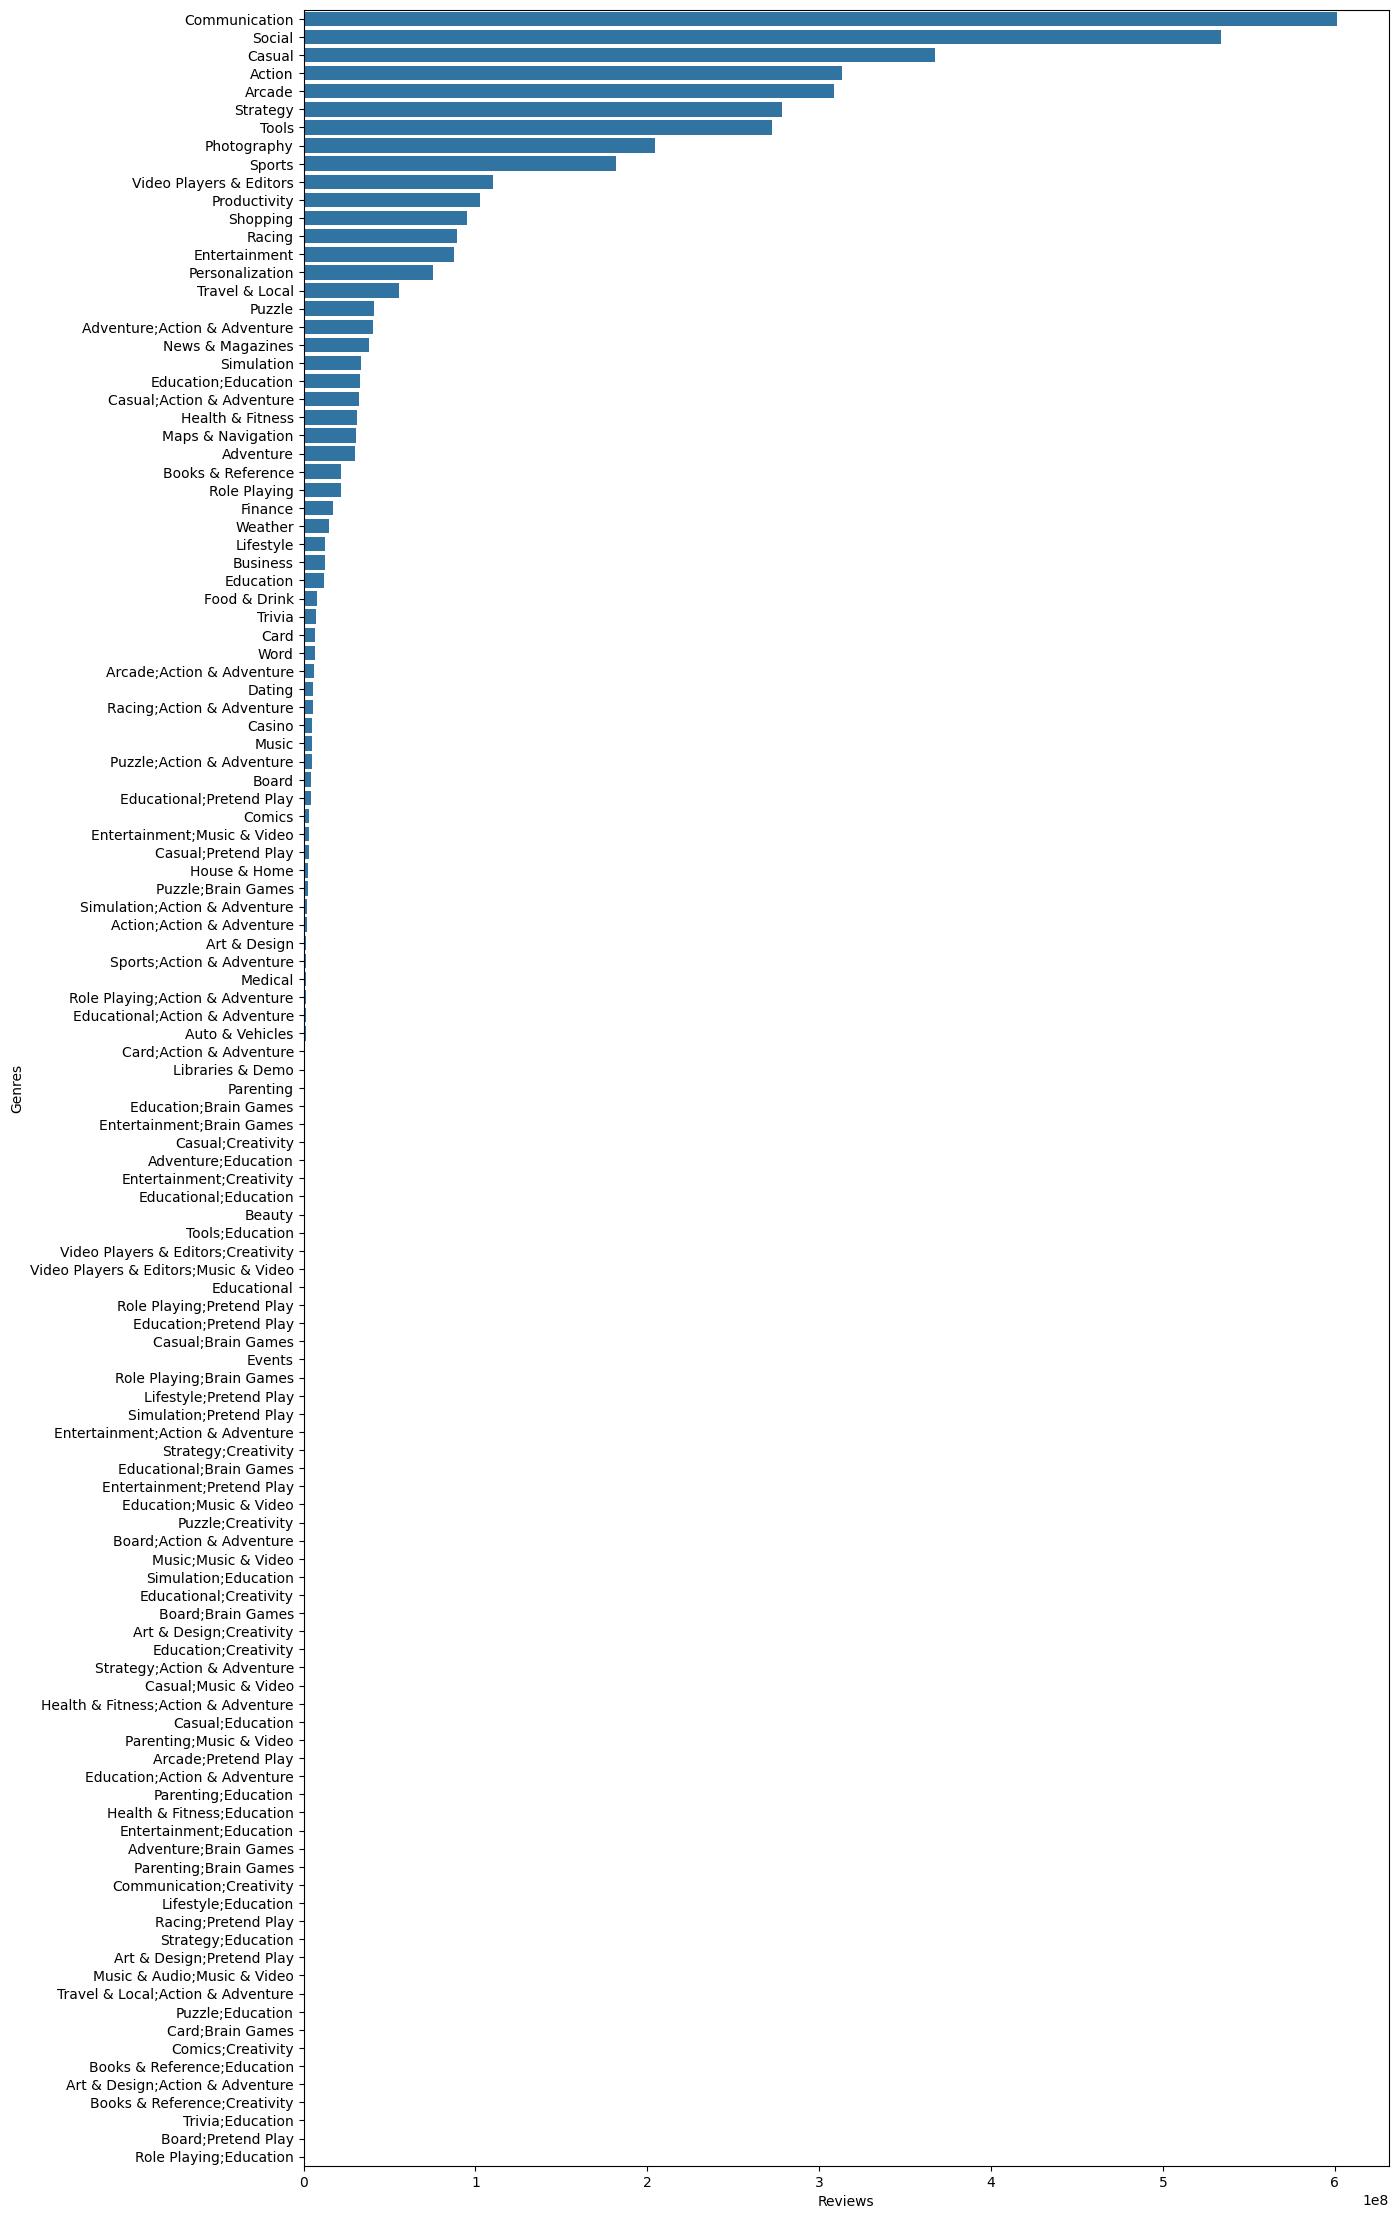

In [19]:
# Chart - 3 visualization code
plt.rcParams['figure.figsize']=(14,28)
sns.barplot(data=genres_highest_reviews, y='Genres', x='Reviews', orient='h')
plt.show()

Here we found that sum of the reviews are highest for 'Communication'.

#### Installs and Reviews

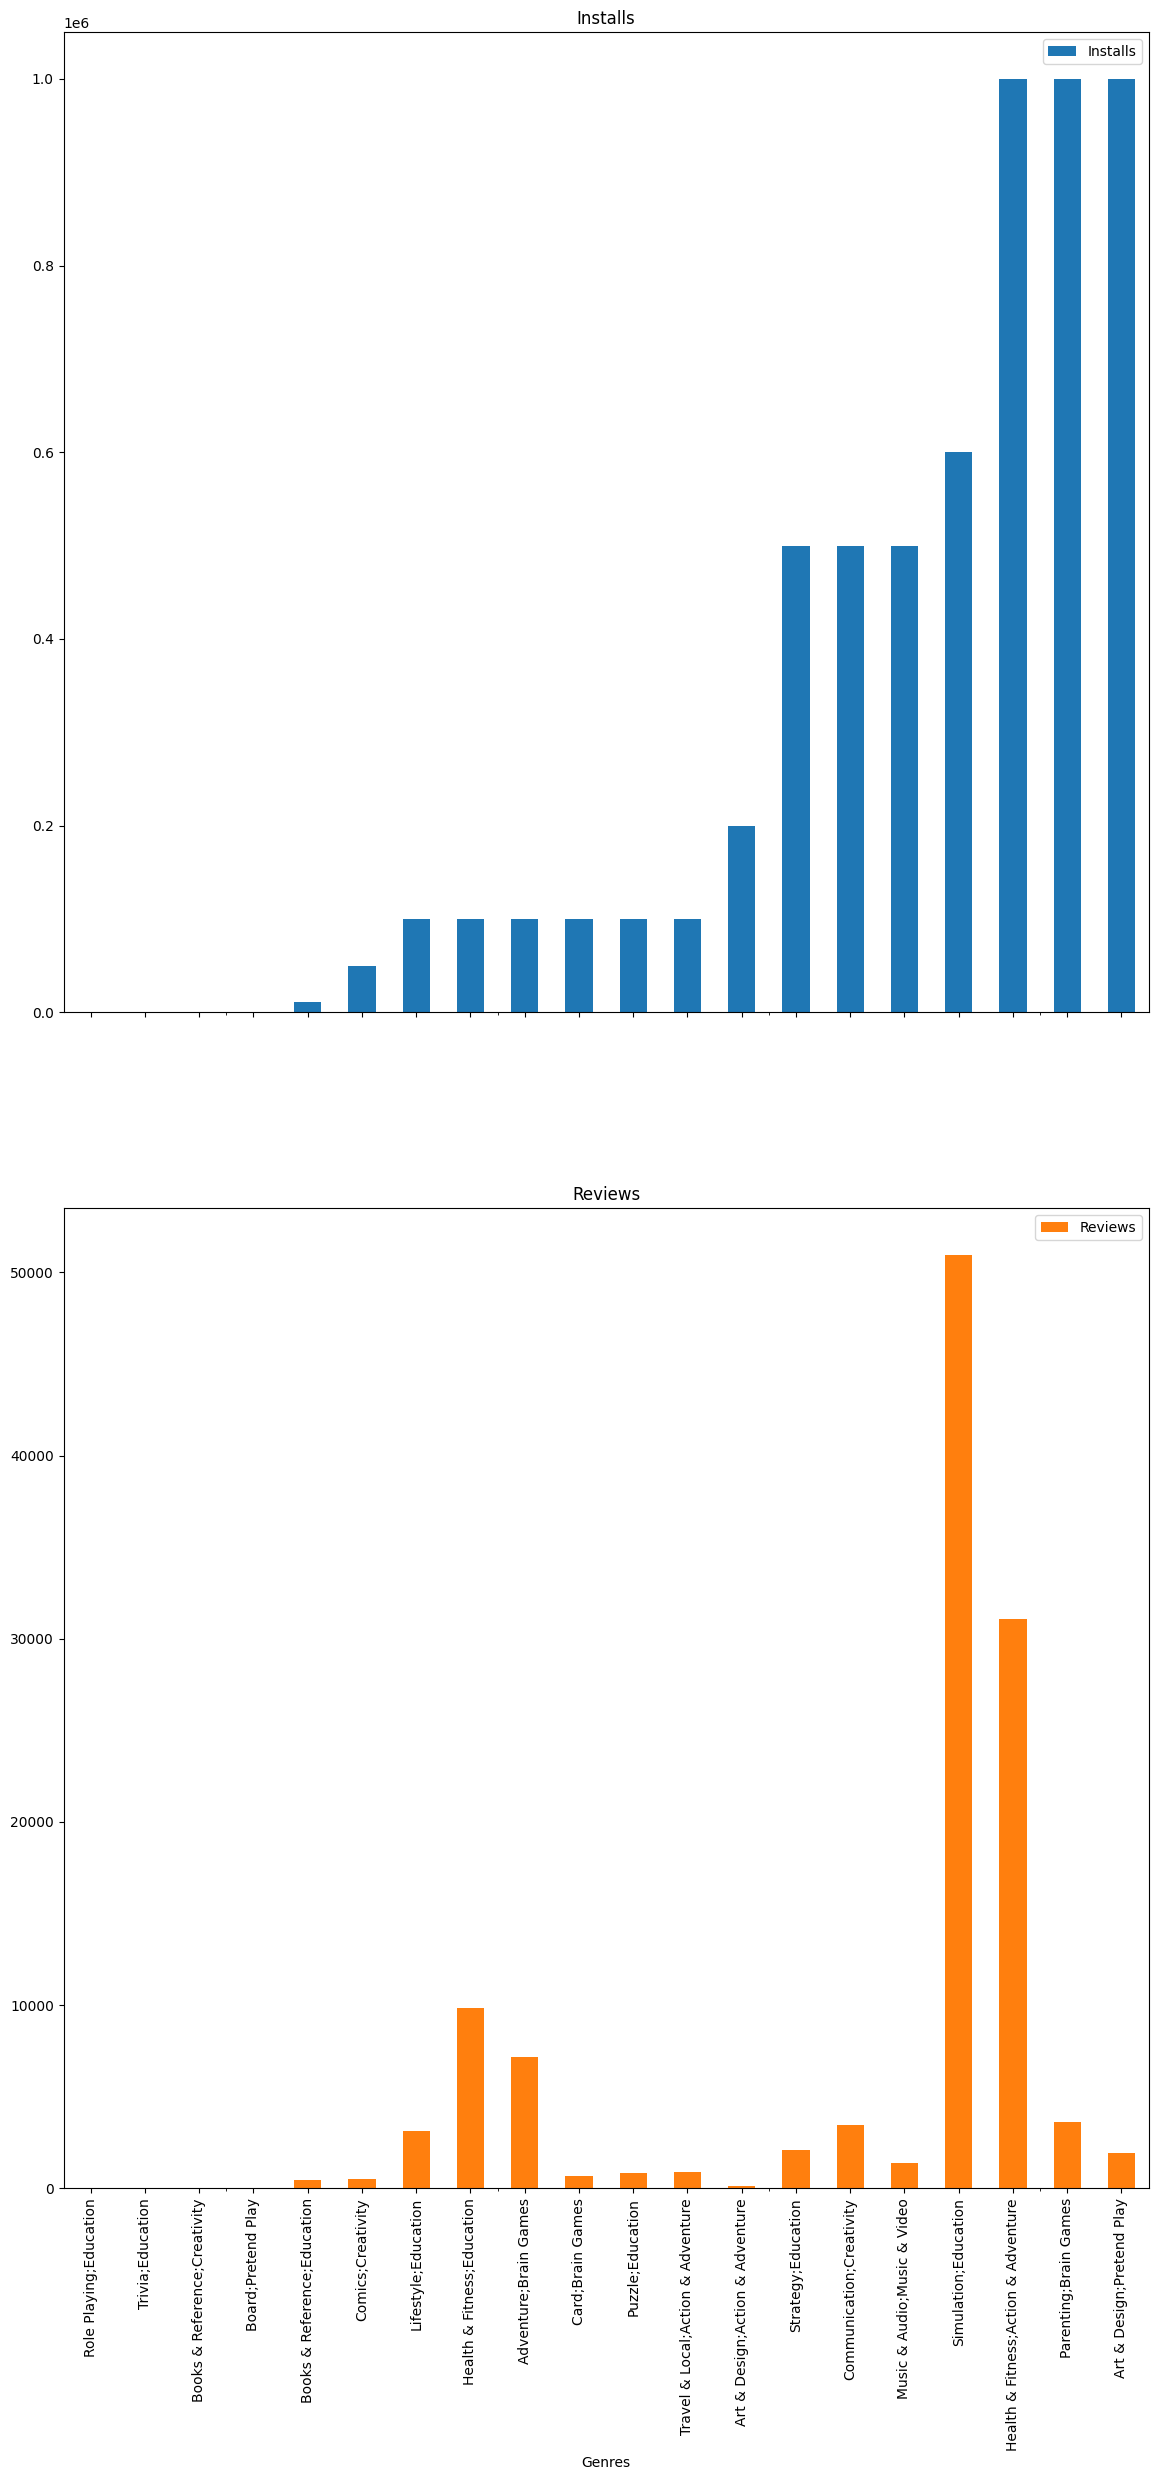

In [20]:
dataWrangling.df.groupby(['Genres'])[['Installs', 'Reviews']].sum().sort_values(by='Installs').head(20).plot.bar(subplots=True)
plt.show()

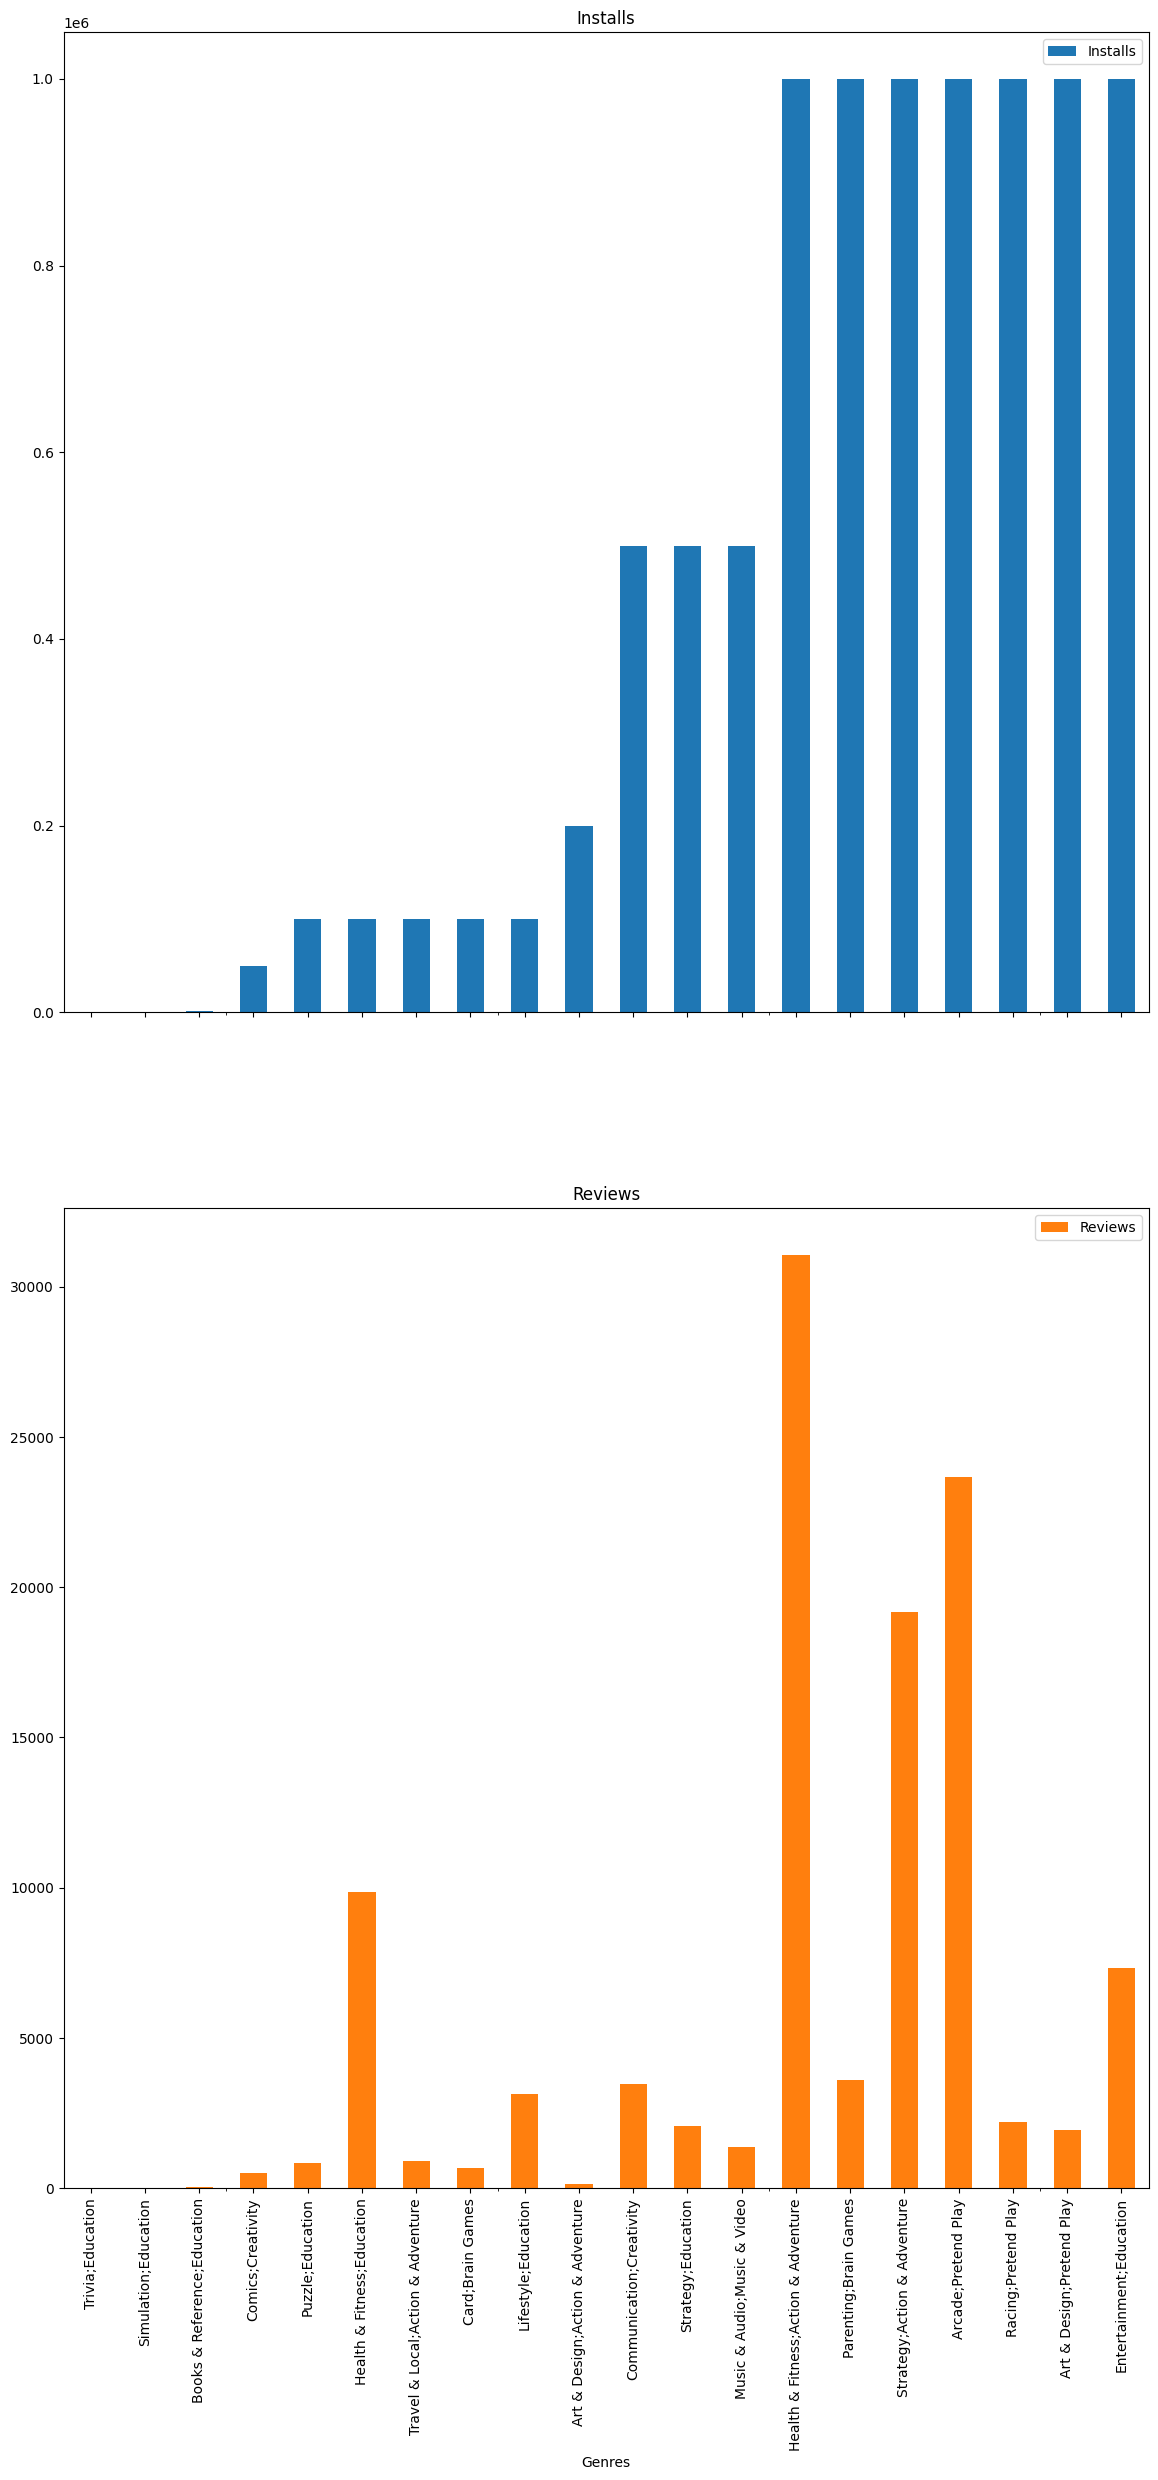

In [21]:
dataWrangling.free.groupby(['Genres'])[['Installs', 'Reviews']].sum().sort_values(by='Installs').head(20).plot.bar(subplots=True)
plt.show()

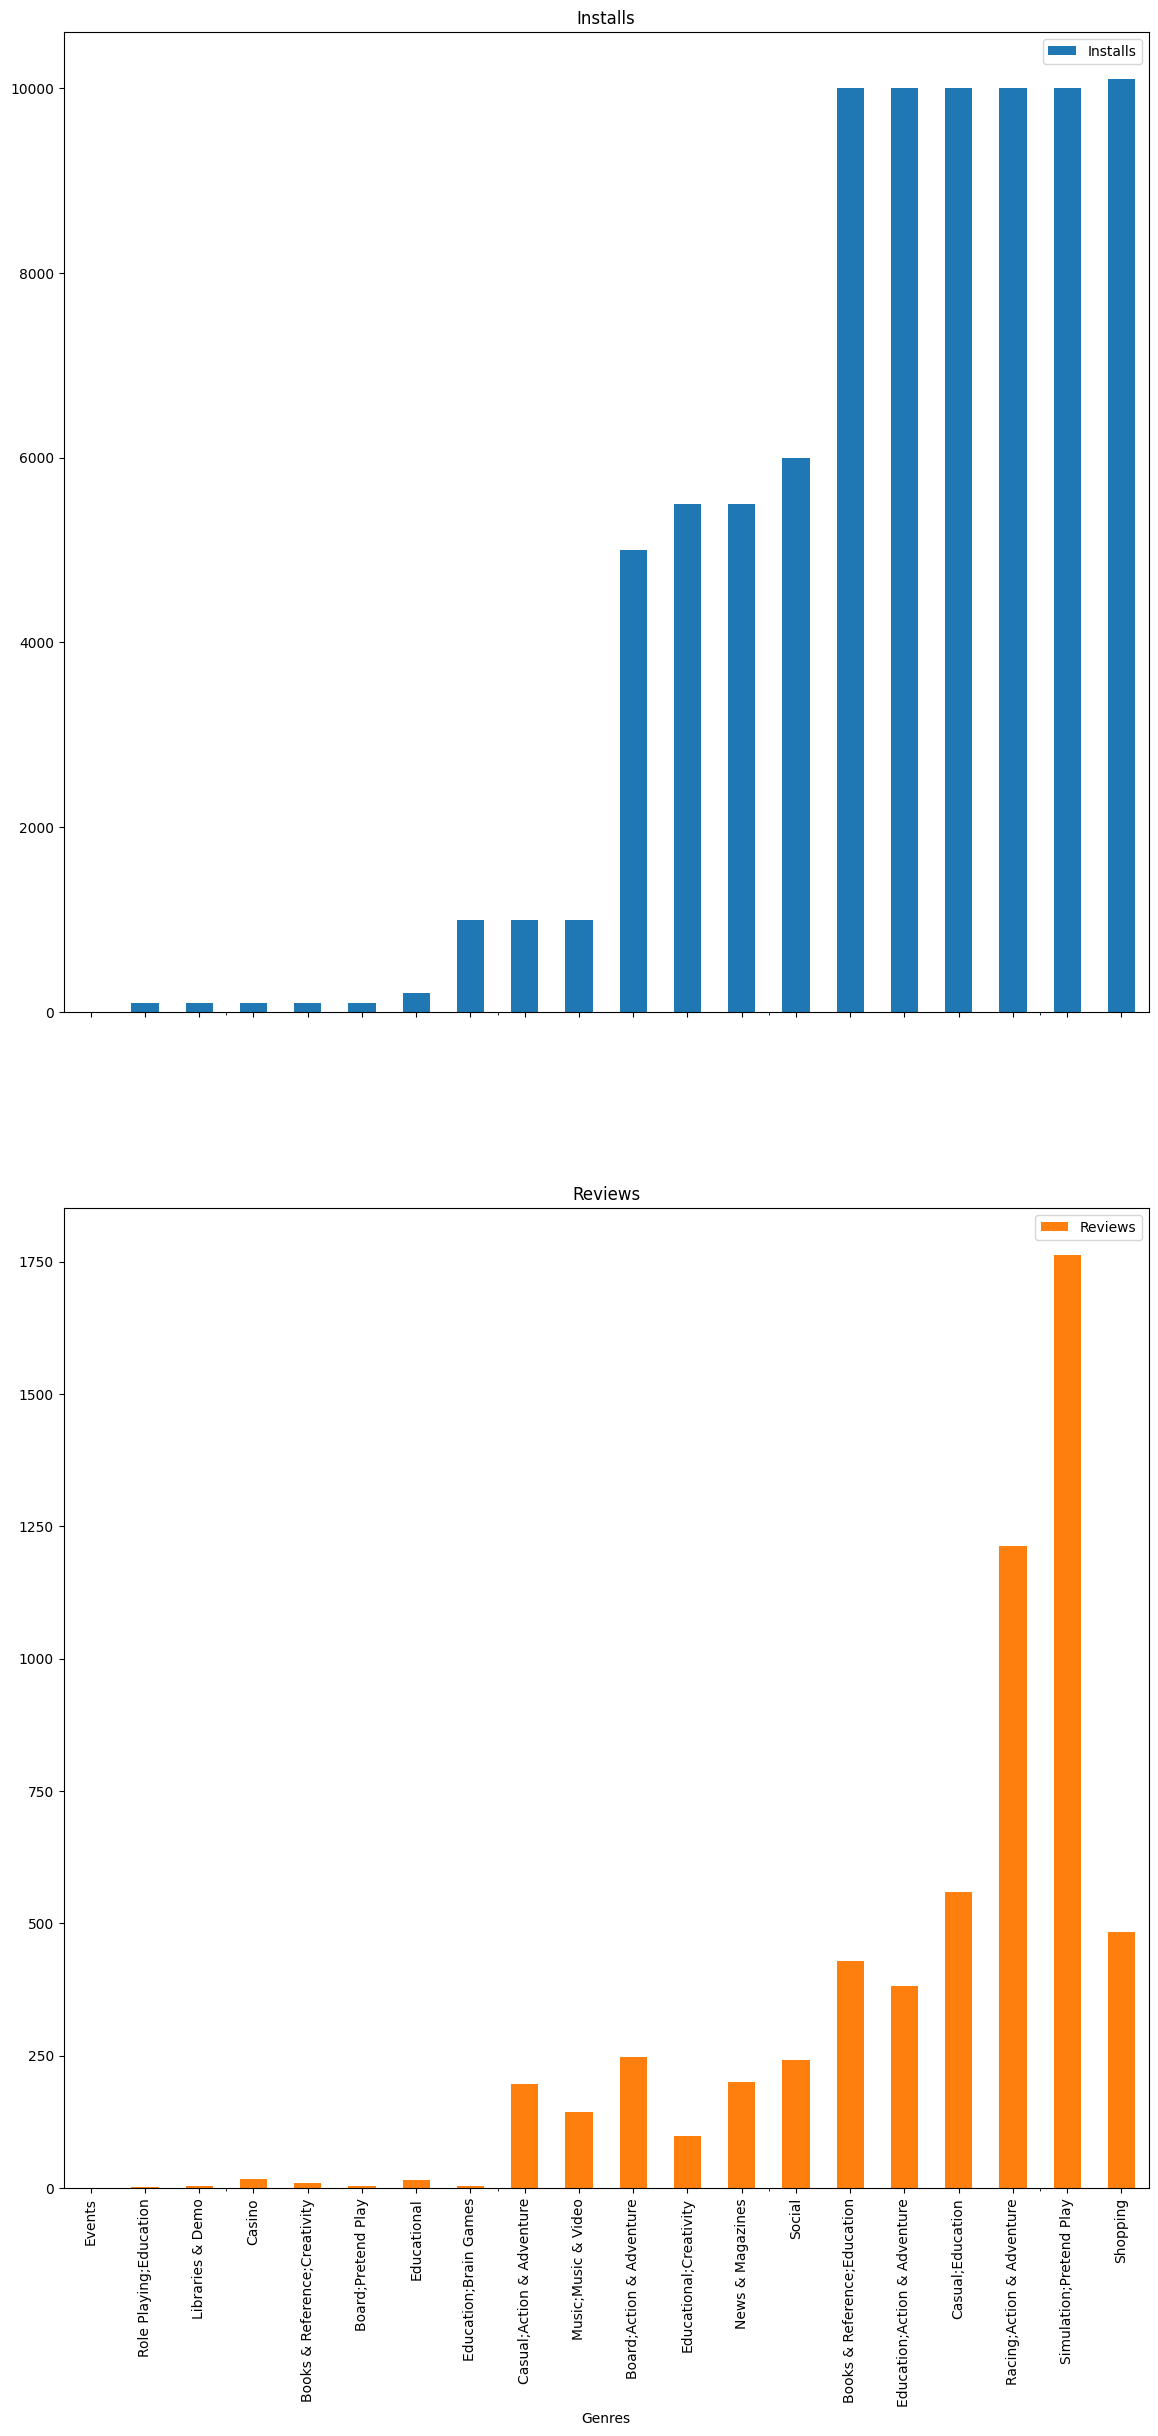

In [22]:
dataWrangling.paid.groupby(['Genres'])[['Installs', 'Reviews']].sum().sort_values(by='Installs').head(20).plot.bar(subplots=True)
plt.show()

Number of reviews are getting increased with number of installs.

#### Sum of reviews of paid df for each genres

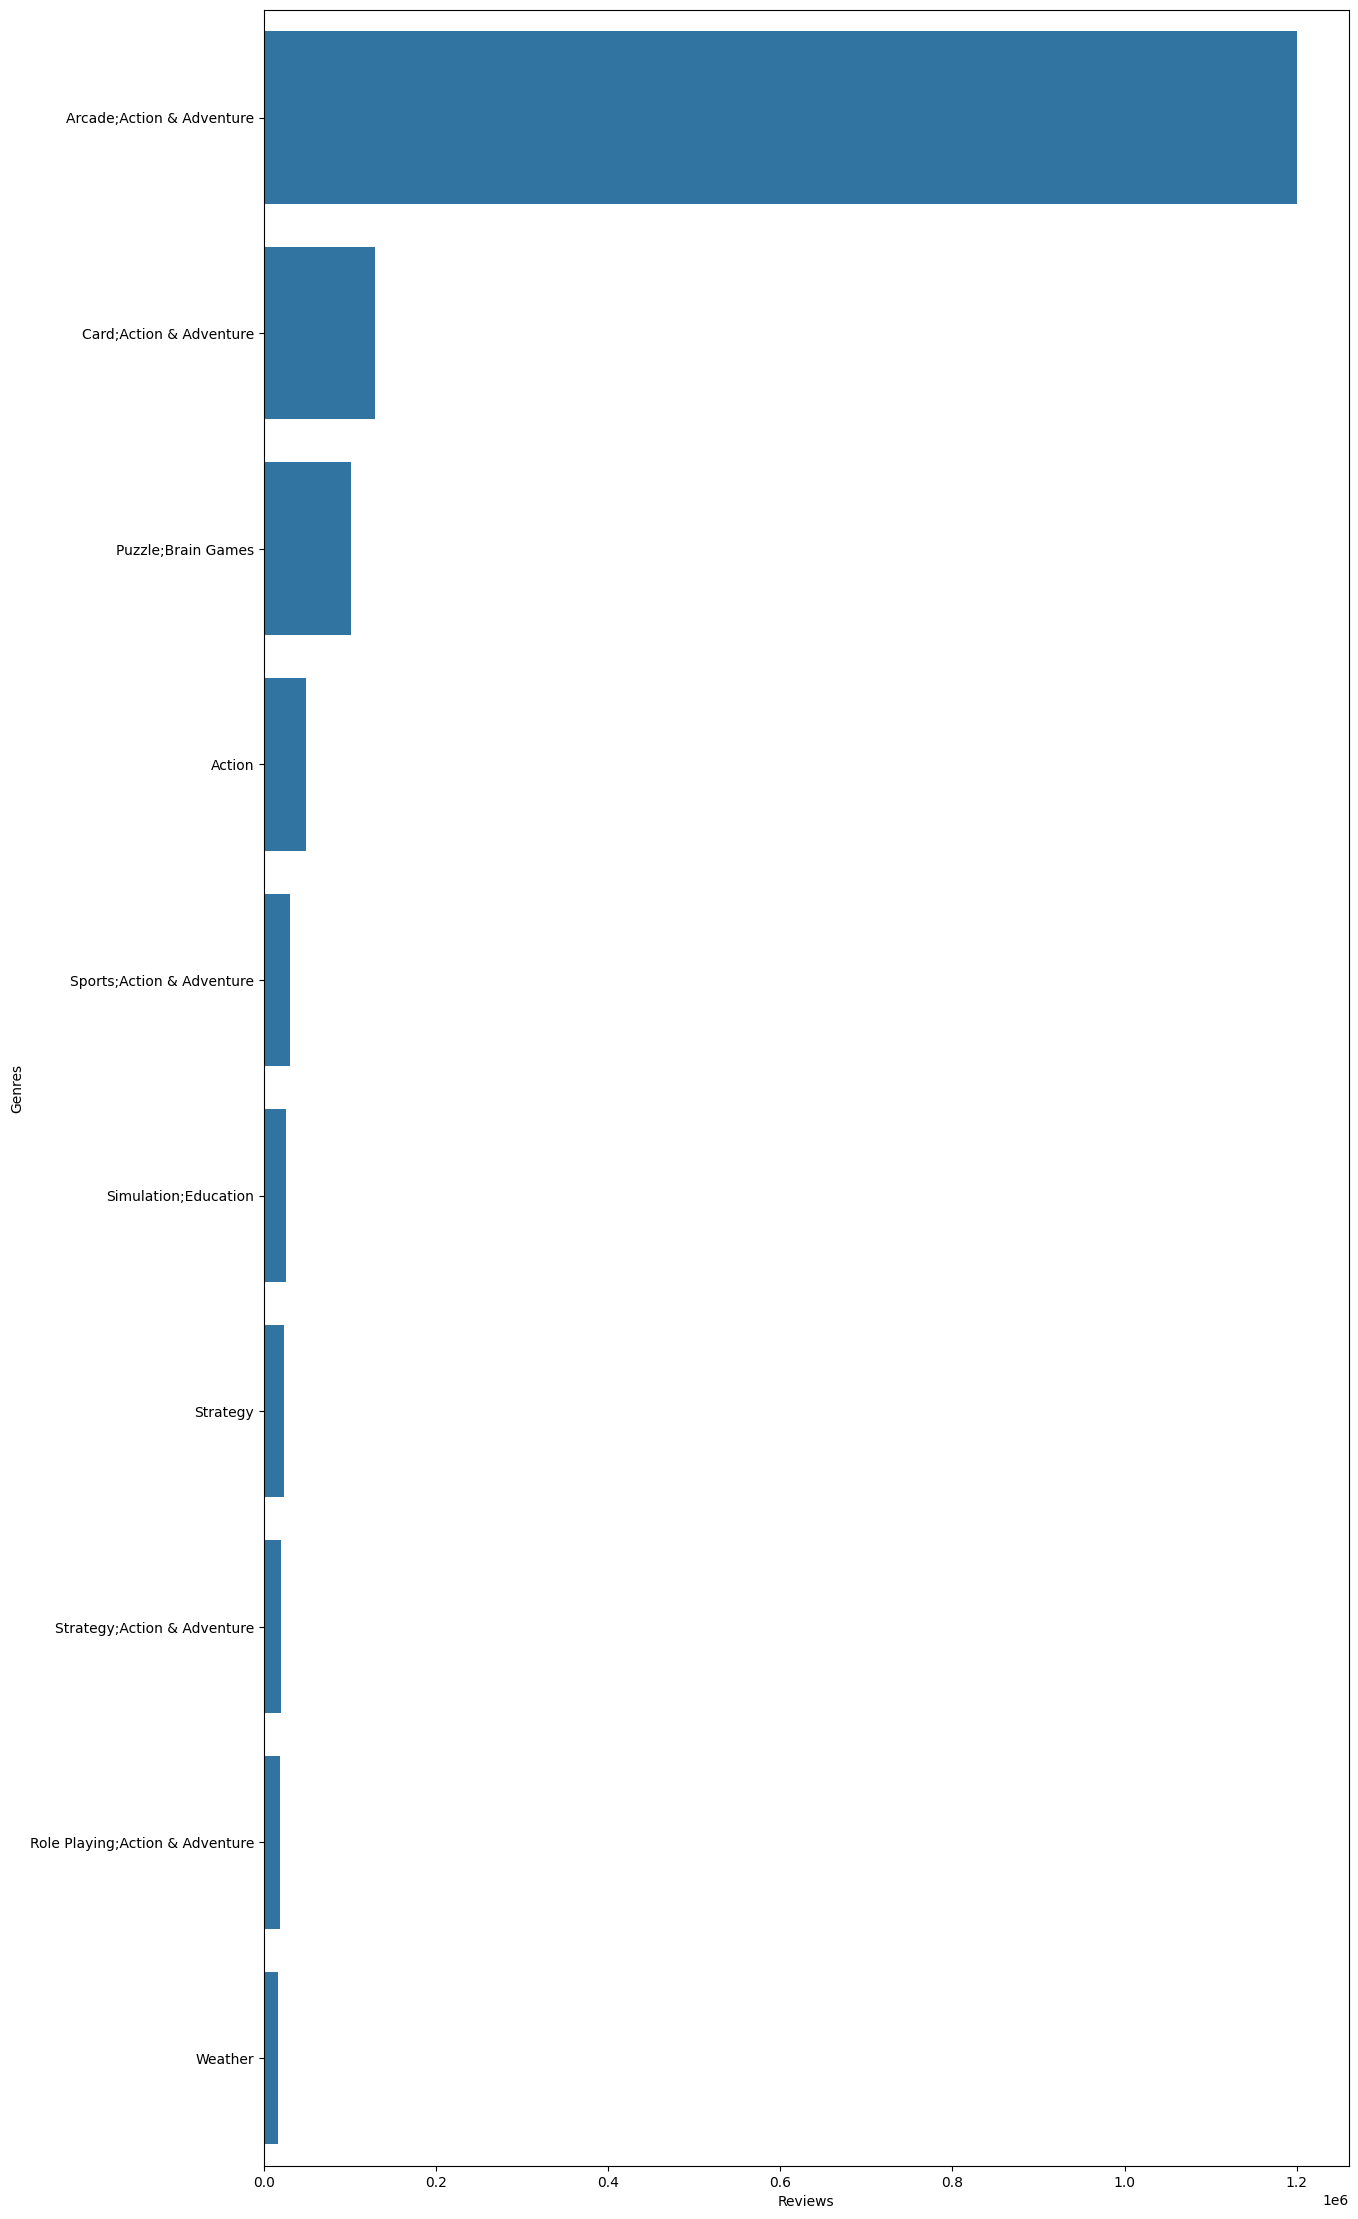

In [23]:
x= dataWrangling.paid.groupby(['Genres'])['Reviews'].mean().sort_values(ascending=False).reset_index().head(10)
sns.barplot(data=x, y='Genres', x='Reviews', orient='h')
plt.show()

#### Counts for content Rating

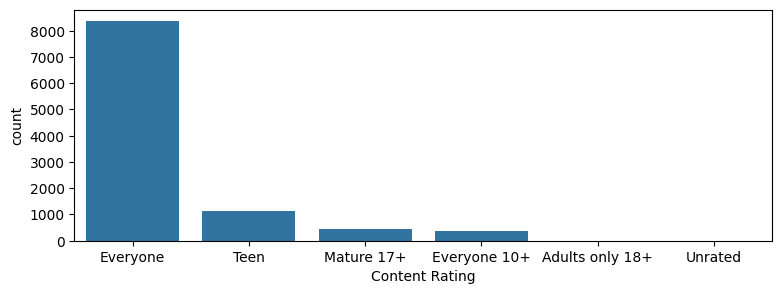

In [24]:
plt.rcParams['figure.figsize']=(9,3)
x=dataWrangling.df['Content Rating'].value_counts().reset_index()
sns.barplot(data=x, x='Content Rating',y='count')
plt.yticks(np.arange(0,8700, 1000))
plt.show()

more then 8000 apps are of type Everyone, rest of the categories are less than 1000.

#### Top 10 successful genres

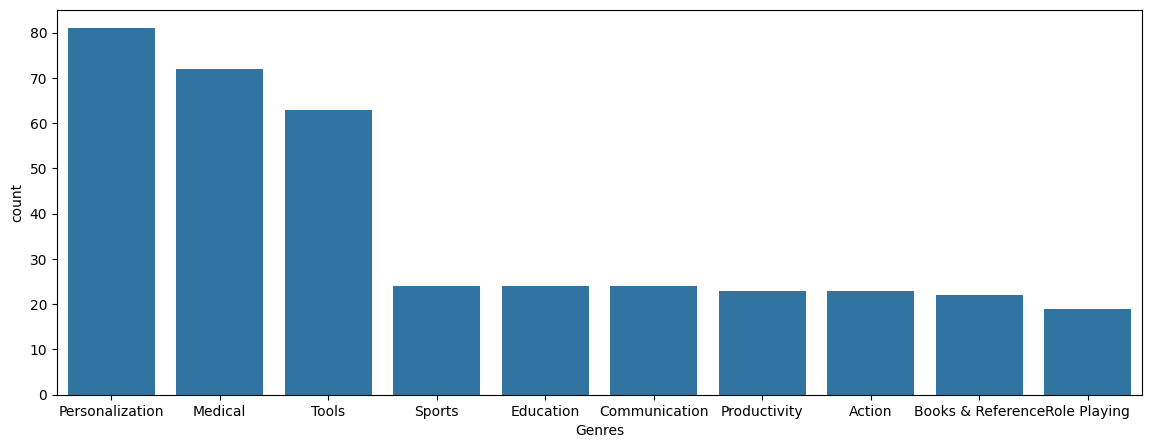

In [25]:
plt.rcParams['figure.figsize']= (14,5)
x= dataWrangling.df_success['Genres'].value_counts().sort_values(ascending=False).reset_index()
sns.barplot(data= x.head(10), x='Genres', y='count')
plt.show()

Number of apps in 'Personalization', 'Medical'and tools are more than 60 and rest of the Genres are less than 30.

#### Top genres with highest mean price

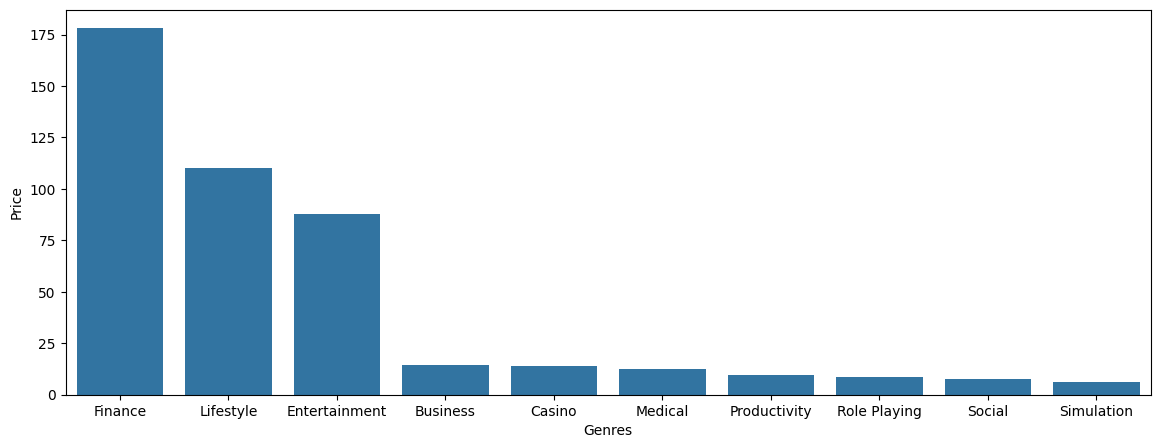

In [26]:
x= dataWrangling.df_success_paid.groupby(['Genres'])['Price'].mean().sort_values(ascending=False).reset_index()
sns.barplot(data= x.head(10), x='Genres', y='Price')
plt.show()

Top three genres with mean price are Finance, Lifestyle and Entertainment.

#### Top apps with highest review count.

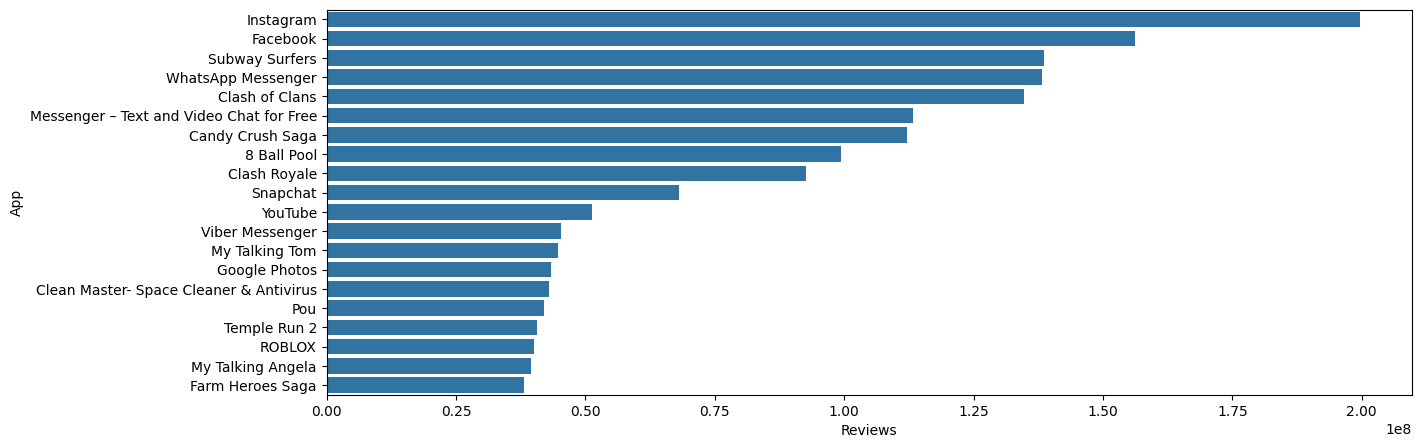

In [27]:
sns.barplot(data=top_apps.head(20), y='App', x='Reviews', orient='h')
plt.show()

Instagram has highest number of reviews.

#### Chart - 14 - Correlation Heatmap

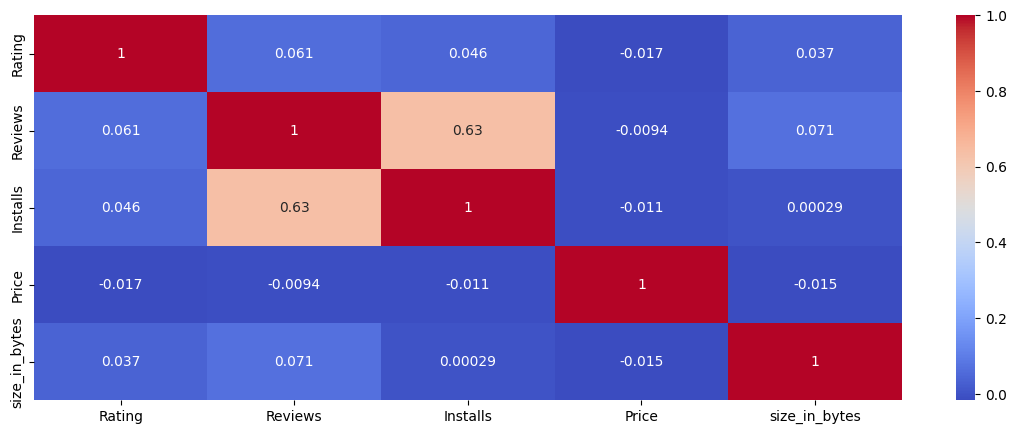

In [28]:
# Correlation Heatmap visualization code
dataWrangling.df.describe()
corr_cols= ['Rating', 'Reviews', 'Installs', 'Price', 'size_in_bytes']
cor= dataWrangling.df[corr_cols].corr()
sns.heatmap(data=cor, annot=True, cmap='coolwarm')
plt.show()

Reviews and Installs are 63% correlated with each other, rest of the features has very less correlation.

#### Chart - 15 - Pair Plot

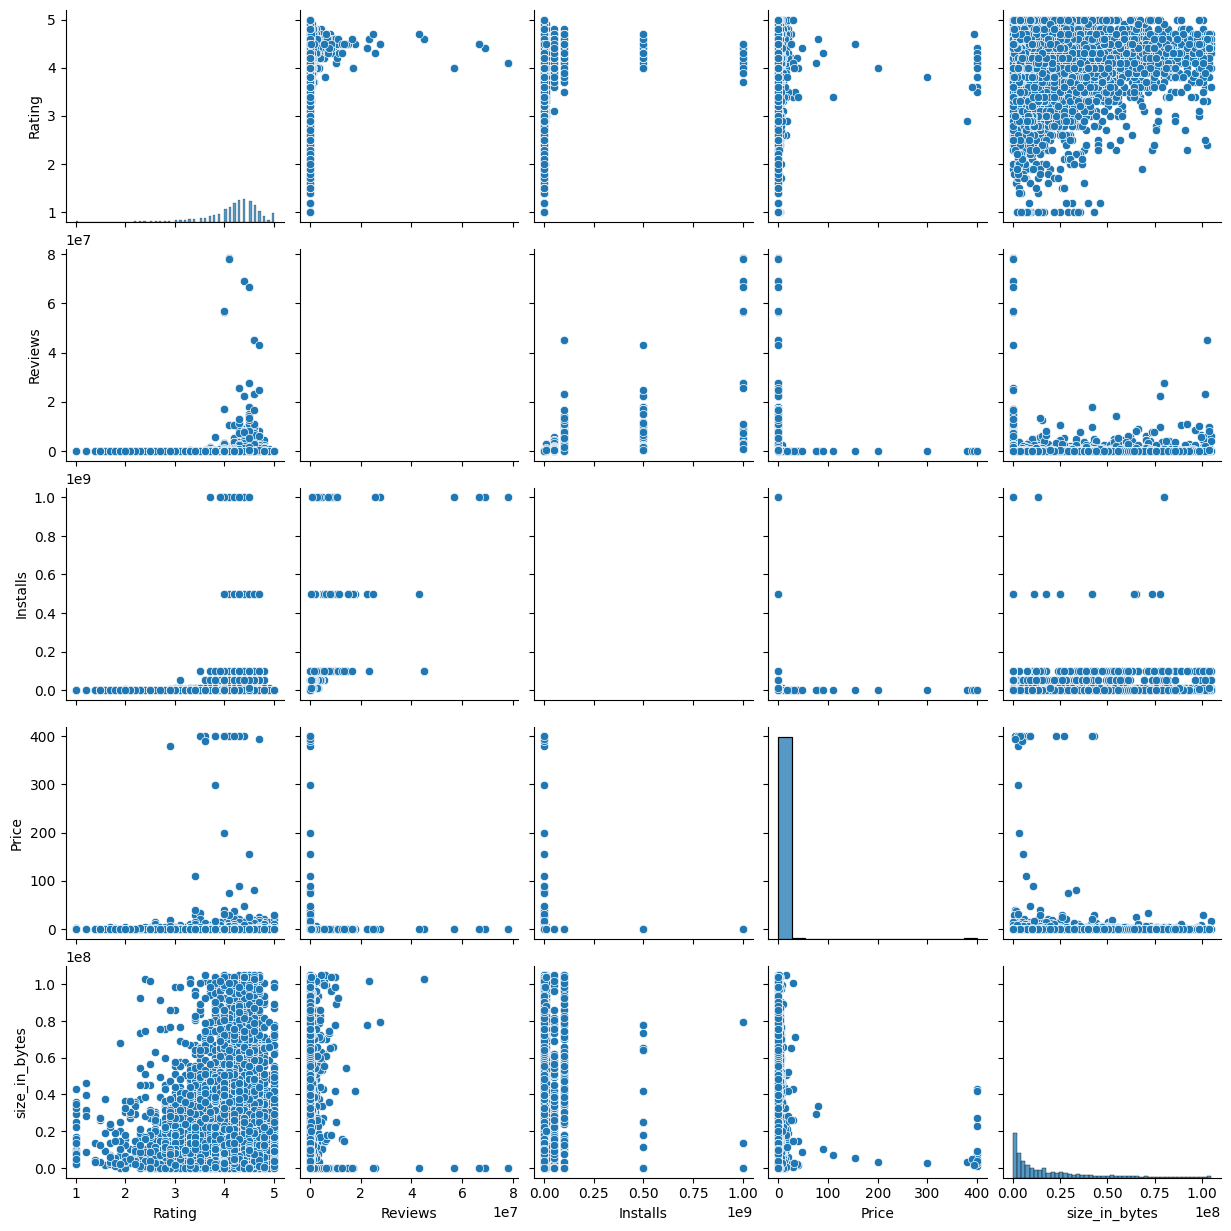

In [29]:
# Pair Plot visualization code
sns.pairplot(data=dataWrangling.df[corr_cols])
plt.show()

we can see there is no linear relationship between the above features.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

1. Huge difference between paid and free reviews hence we can conclude that make the app with no cost untill get enough revivews later make them paid.
2. Apps in Finance, Lifestyle and Entertainment genres are succesfull and will be profitable.

# **Conclusion**

1. Top genres with highest reviews: Communications
2. Costliest Genres by mean price: Finance